# AIM Drone Optimizer

L'obiettivo del progetto è risolvere una semplice variante del problema del commesso viaggiatore (noto problema di ottimizzazione combinatoria con riscontri pratici ancora attuali, per saperne di più: https://en.wikipedia.org/wiki/Travelling_salesman_problem) con alcuni semplici metodi, usando basi di programmazione a oggetti e alcune librerie di base.

Segue il testo completo. 

PS Per info, problemi, approfondimenti o altro, potete contattarmi all'indirizzo filippo.fedeli@mail.polimi.it o su cellulare al +393386561042

#Definizione del problema

Nel 2020, AIM è diventata così popolare da non permettere al team amministrativo di gestire la consegna delle tessere AIM. Viene dunque valutato l'acquisto di un Drone AIM, in grado di volare e atterrare dove necessario.

Il tuo compito, come nuovo intern del team amministrativo è, conoscendo a priori le posizioni (date dalla variabile positions) dei soci a cui si deve portare le tessere, ottimizzare il percorso del drone in modo da minimizzare la distanza percorsa dal drone. 

In particolare, vengono studiate due opzioni: la prima, con un drone in grado di volare in ogni direzione, per cui la metrica da ottimizzare è il MSE, la seconda, con un drone in grado di volare soltanto in direzione degli assi cardinali, per cui la metrica da ottimizzare è il MAE.

Per **prima cosa**, definisci una funzione MSE e una funzione MAE per valutare la qualità dei percorsi, dove, essendo la lista di posizioni ordinate: 

 $$ MSE = \frac{1}{n}\sum_{t=1}^{n} (x_{t}-x_{t-1})^2 + (y_{t}-y_{t-1})^2   $$

 $$ MAE = \frac{1}{n}\sum_{t=1}^{n} |x_{t}-x_{t-1}| + |y_{t}-y_{t-1}|   $$

Mostra a schermo il MAE e il MSE della lista iniziale positions.

PS Ti sono inoltre date varie funzioni per visualizzare il percorso del drone che ricevono in ingresso una lista di liste strutturata come positions, con le posizioni in ordine di visita del drone.
e.g. se decido di far visitare al drone in ordine le posizioni (x = 1, y= 1), (x = 4, y = 2), (x = 3, y = 4),  la lista finale sarà = [[1,1],[4,2],[3,4]].
Il punto iniziale viene rappresentato in verde. Il secondo in blu, in modo da vedere il verso della traiettoria rappresentata.




In [ ]:
!pip install matplotlib

#!pip3 install matplotlib

# Su Mac, esegui il secondo comando e commenta il primo.
# Se stai usando Anaconda, NON eseguire la cella.

MSE = 38571.333333333336
MAE = 190.0


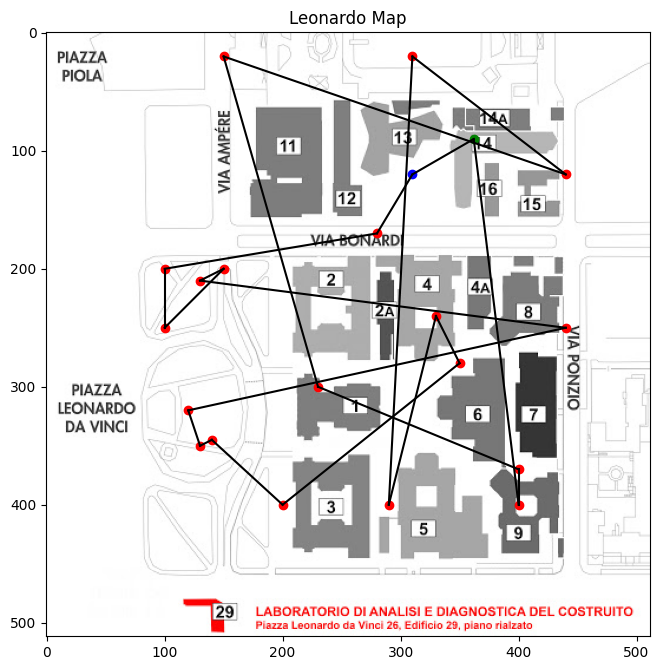

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img=plt.imread("poli2.jpg")
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Leonardo Map") 

positions = [[362,90],[310,120],[280,170],[100,200],[100,250],[150,200],[130,210],[440,250],[120,320],[130,350],[140,345],[200,400],[350,280],[330,240],[290,400],[310,20],
            [440,120],[150,20],[230,300],[400,370],[400,400],[362,90]]

# cambiare il terzo in 240,120 cambia totalmente (in meglio) la traiettoria del greedy


# visualizza il percorso del drone che può muoversi ovunque
def trajectory(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x2],[y1,y2],'k-')

# visualizza il percorso del drone che può muoversi solo in linea retta
def trajectory_MAE(pos):
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    plt.plot(x[2:-1], y[2:-1], 'ro') 
    plt.plot(x[1],y[1],'bo')
    plt.plot(x[0],y[0],'go')
    for i in range(1,len(pos)):
        x1,x2 = pos[i][0], pos[i-1][0]
        y1,y2 = pos[i][1], pos[i-1][1]
        plt.plot([x1,x1],[y1,y2],'k-')
        plt.plot([x1,x2],[y2,y2],'k-')


def MSE(pos):
    loss = 0
    x = [item[0] for item in pos]
    y = [item[1] for item in pos]
    for i in range(1,len(pos)):
        loss += (x[i]-x[i-1])**2 + (y[i]-y[i-1])**2
    return(loss/(len(pos)-1))

def MAE(pos):
  loss = 0
  x = [item[0] for item in pos]
  y = [item[1] for item in pos]

  for i in range(1,len(pos)):
      loss += (abs(x[i]-x[i-1])) + abs((y[i]-y[i-1]))
  return(loss/(len(pos)-1))
    

def performance(pos,metrics = MSE):
    loss = metrics(pos)
    return(loss)

print(f"MSE = {performance(positions,MSE)}")
print(f"MAE = {performance(positions, MAE)}")

trajectory(positions)


plt.imshow(img)

# Random Optimizer

Ora, costruiamo una classe Random_Optimizer che, ad ogni passo, si muove random in una delle posizioni ancora non visitate. La struttura della classe è già data qui di seguito, comprese le funzioni per plottare le traiettorie.

Funziona meglio della disposizione di base? 

**Bonus**

E se invece modifichiamo la classe in modo che provi 100 traiettorie random e restituisca la migliore? 

NB : In questo caso dovremmo passare alla classe, come nel caso successivo del greedy, una metrica con cui misurare la 'migliore'.



In [ ]:
import random

class Random_Optimizer:
    def __init__(self, positions):
        self.positions = positions
        self.schedule = [positions[0]]

    def scheduler(self):
        pos = self.positions[1:-1]
        random.shuffle(pos)
        pos.insert(0,self.positions[0])
        pos.append(self.positions[0])
        self.schedule = pos
        return(self.schedule)

# NON USATE EXTEND IN QUESTO CASO, HUGE DROP IN PERFORMANCES

    def plot(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map") 
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x2],[y1,y2],'k-')

    def plot_MAE(self):
        img=plt.imread("poli2.jpg")
        fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
        plt.title("Leonardo Map")      
        x = [item[0] for item in self.schedule]
        y = [item[1] for item in self.schedule]
        plt.plot(x[2:-1], y[2:-1], 'ro') 
        plt.plot(x[1],y[1],'bo')
        plt.plot(x[0],y[0],'go')
        for i in range(1,len(self.schedule)):
            x1,x2 = self.schedule[i][0], self.schedule[i-1][0]
            y1,y2 = self.schedule[i][1], self.schedule[i-1][1]
            plt.plot([x1,x1],[y1,y2],'k-')
            plt.plot([x1,x2],[y2,y2],'k-')


# questa implementazione di scheduler dovrebbe essere la più veloce ottenibile utilizzando la lista come struttura dati di base.

# Greedy Optimizer

Come passo finale, invece, ereditando da Random_Optimizer (in questo modo non c'è bisogno di ridare alla classe che creiamo tutte le funzioni che sono in comune con la classe base, per maggiori informazioni: https://www.python-course.eu/python3_inheritance.php), costruiamo una classe Greedy_Optimizer che, ad ogni passo, si muove nella posizione più vicina alla posizione precedente. In questo caso, passiamo alla classe anche la funzione che vogliamo ottimizzare (MSE o MAE).

In [ ]:
class Greedy_Optimizer(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions)
        self.loss = loss

    def scheduler(self):
        temp = self.positions[1:-1] 
        current = self.positions[0]
        for i in range(len(temp)):
            if self.loss == MSE:
                error = lambda x : [(x[k][0] - current[0])**2 + (x[k][1] - current[1])**2 for k in range(len(x))]
            if self.loss == MAE:
                error = lambda x : [abs(x[k][0] - current[0]) + abs(x[k][1] - current[1]) for k in range(len(x))]
            squares = error(temp)
            indexes = sorted(range(len(squares)),key=squares.__getitem__)
            self.schedule.append(temp[indexes[0]])
            current = temp[indexes[0]]
            temp.pop(indexes[0])
        self.schedule.append(self.positions[0])
        return(self.schedule)

# questa implementazione NON è efficiente (ANZI), ma mostra alcuni utili trucchetti in Python e viene estesa al caso del random greedy con pochissimi cambiamenti.

# riporto un esempio di implementazione alternativa di Erica Espinosa, veloce, semplice e compatta.

class Greedy_Optimizer_1(Random_Optimizer):
    def __init__(self, positions, loss):
        super().__init__(positions) # non toccare, uso il constructor della classe padre
        self.loss = loss
        for i in range(len(positions)):
            self.schedule.append(positions[i])

    def scheduler(self):
        pos = self.schedule 
        for i in range(len(pos)-3):
            best = pos[i+1]
            dist_best = performance([pos[i],best],self.loss)
            for j in range(i+2,len(pos)-1):
                temp_dist = performance([pos[i],pos[j]],self.loss)
                if (temp_dist < dist_best ):
                    temp_pos = pos[i+1]
                    pos[i+1]=pos[j]
                    pos[j]=temp_pos
                    dist_best = temp_dist
                
        return self.schedule 





# (Honours Track) Random Greedy Optimizer 

In [ ]:
!pip install numpy

#!pip3 install numpy

# Su Mac, esegui il secondo comando e commenta il primo.
# Se stai usando Anaconda, NON eseguire la cella.



In [ ]:
import numpy as np

class Random_Greedy_Optimizer(Greedy_Optimizer):
    def __init__(self, positions, loss, iterations):
        super().__init__(positions,loss)
        self.iterations = iterations

    def scheduler(self):
        self.schedule = [self.positions[0]]
        temp = self.positions[1:-1] 
        current = self.positions[0]
        for i in range(len(temp)):
            if self.loss == MSE:
                error = lambda x : [(x[k][0] - current[0])**2 + (x[k][1] - current[1])**2 for k in range(len(x))]
            if self.loss == MAE:
                error = lambda x : [abs(x[k][0] - current[0]) + abs(x[k][1] - current[1]) for k in range(len(x))]
            squares = error(temp)
            index = sorted(range(len(squares)),key=squares.__getitem__)
            invsquares = [1/i for i in squares]
            p = [float(i)/sum(invsquares) for i in invsquares]
            index = np.random.choice(range(len(p)),p = p)
            self.schedule.append(temp[index])
            current = temp[index]
            temp.pop(index)
        self.schedule.append(self.positions[0])
        return(self.schedule)


    def run(self):
        schedules = []
        for i in range(iterations):
            schedules.append(self.scheduler())
        MSEs = [MSE(sched) for sched in schedules]
        indexes = sorted(range(len(MSEs)),key=MSEs.__getitem__)
        self.schedule = schedules[indexes[0]]
        return(self.schedule)
        


Ora paragona le performances dei metodi proposti sopra, ottimizzando prima rispetto al MSE e poi rispetto al MAE. 

Plottando e guardando a occhio, sembra che la soluzione del greedy sia ottimale? Lascia sotto il plot della traiettoria ottenuta dal greedy con MSE.

Riporta inoltre il MAE e il MSE ottenuti con il vettore iniziale, il Random_Optimizer (fissando il seed) e il Greedy_Optimizer.



Performance of Random_Opt = 48400.857142857145
Performance of Initial schedule = 38571.333333333336
Performance of Greedy_Opt = 13085.619047619048
Performance of Greedy_Opt trained on MSE = 13085.619047619048
Performance of Random_Greedy_Opt = 9516.095238095239


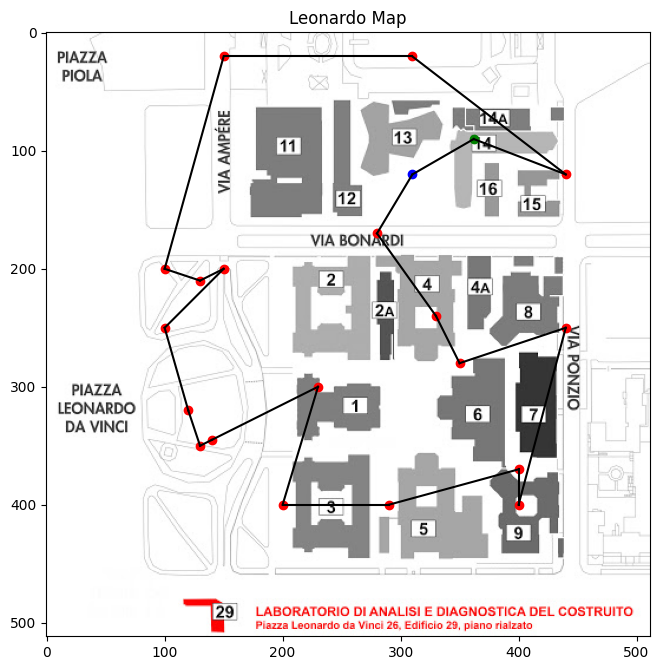

In [ ]:
np.random.seed(3)
random.seed(0)

metrics = MSE
iterations = 10000
D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)
D3 = Random_Greedy_Optimizer(positions, metrics,iterations)
D4 = Greedy_Optimizer(positions, MSE)

print(f"Performance of Random_Opt = {performance(D1.scheduler(), metrics)}")
print(f"Performance of Initial schedule = {performance(positions, metrics)}")
print(f"Performance of Greedy_Opt = {performance(D2.scheduler(), metrics)}")
print(f"Performance of Greedy_Opt trained on MSE = {performance(D4.scheduler(), metrics)}")
print(f"Performance of Random_Greedy_Opt = {performance(D3.run(), metrics)}")


D3.plot()
#D2.plot_MAE()
plt.imshow(img)



In [ ]:
metrics = MSE
D1 = Random_Optimizer(positions)
D2 = Greedy_Optimizer(positions, metrics)

%timeit performance(D1.scheduler(), metrics)
%timeit performance(D2.scheduler(), metrics)

# non timeo nemmeno il random greedy, che sarà molto più lento.

10000 loops, best of 3: 28.5 µs per loop
1000 loops, best of 3: 26.2 ms per loop


Adottiamo qui, in realtà un approccio naïf, che può essere molto raffinato anche nelle sue versioni più semplici; per prima cosa, precalcolare la matrice delle distanze è fondamentale per la maggior parte dei metodi più sofisticati e, anche nel caso del (random) greedy, porterebbe ad un algoritmo più veloce.

Estensioni possibili:

* Ricerca esaustiva (SCONSIGLIATO, diventa molto lento già così, in quanto scala fattorialmente)  
* Programmazione lineare mista/intera (https://towardsdatascience.com/how-i-saved-christmas-with-the-travelling-salesman-problem-3d85c190ed9d)

* Programmazione Dinamica -> Algoritmo di Held-Karp (https://medium.com/basecs/speeding-up-the-traveling-salesman-using-dynamic-programming-b76d7552e8dd)

* Ant Colony Optimization (https://github.com/ppoffice/ant-colony-tsp/blob/master/aco.py)

* Algoritmi Genetici (https://towardsdatascience.com/python-genetic-algorithms-and-the-traveling-salesman-problem-f65542fae5d)

* Cross-entropy (https://github.com/v-iashin/CrossEntropyTSP)

* Simulated Annealing (https://towardsdatascience.com/how-to-solve-the-traveling-salesman-problem-a-comparative-analysis-39056a916c9f)

e molte altre ancora...

Pro Tip: per accedere a tutti gli articoli premium di Medium, potete installare un'estensione come Mediumship, su Chrome, https://github.com/swapagarwal/mediumship.